<a href="https://colab.research.google.com/github/Frankl1sales/Neural-Networks-with-Deep-Learning-Course/blob/main/LeNet_TFDataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
print("TensorFlow version:", tf.__version__)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Resizing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import os
import csv
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

TensorFlow version: 2.17.0


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Label for 0-th train image is: 5


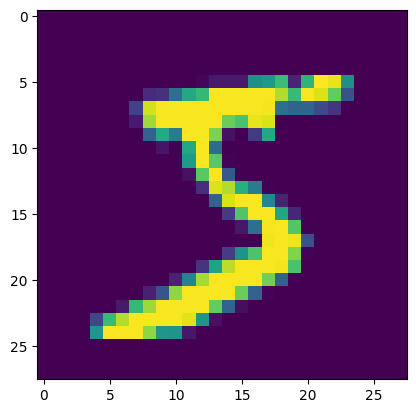

This is the native 0-th train label: 5
This is the one-hot encoding of the 0-th train label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
train_images shape: (60000, 28, 28, 1)
test_images shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

imageIndex = 0
print("Label for " + str(imageIndex) + "-th train image is: " + str(train_labels[0]))
plt.imshow(train_images[0])
plt.show()

# Guardar uma cópia dos labels originais
ori_test_labels = copy.deepcopy(test_labels)

# One-hot encoding dos labels
imageIndex = 0
print("This is the native " + str(imageIndex) + "-th train label: " + str(train_labels[0]))
train_labels = to_categorical(train_labels)
print("This is the one-hot encoding of the " + str(imageIndex) + "-th train label: " + str(train_labels[0]))
test_labels = to_categorical(test_labels)

# Redimensionar as imagens para incluir o canal de cores (1 canal para grayscale)
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

# Normalizar as imagens para terem média zero e desvio unitário
train_mean = train_images.mean()
train_std = train_images.std()

train_images = (train_images - train_mean) / train_std
test_images = (test_images - train_mean) / train_std

# Function to apply augmentation
def augment_data(images, labels):
    # Apply augmentation
    augmented_images = []
    augmented_labels = []
    for i in range(len(images)):
        img = images[i]
        label = labels[i]

        img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
        img = tf.image.random_brightness(img, max_delta=0.2)
        img = tf.image.random_contrast(img, lower=0.8, upper=1.2)

        augmented_images.append(img)
        augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

# Apply the augmentation to the training set
train_images, train_labels = augment_data(train_images, train_labels)

# Normalize the augmented images (if necessary)
train_images = (train_images - train_mean) / train_std

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.1048 - loss: 2.3023 - val_accuracy: 0.1386 - val_loss: 2.3115
Epoch 2/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.1111 - loss: 2.3008 - val_accuracy: 0.1269 - val_loss: 2.3136
Epoch 3/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 63s 69ms/step - accuracy: 0.1146 - loss: 2.2999 - val_accuracy: 0.1180 - val_loss: 2.3039
Epoch 4/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.1127 - loss: 2.2997 - val_accuracy: 0.1259 - val_loss: 2.3011
Epoch 5/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.1117 - loss: 2.2996 - val_accuracy: 0.1171 - val_loss: 2.2902
Epoch 6/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.1123 - loss: 2.2984 - val_accuracy: 0.1081 - val_loss: 2.2866
Epoch 7/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.1130 - loss: 2.2974 - val_accuracy: 0.1254 - val_loss: 2.2643
Epoch 8/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.1167 - loss: 2.2958 - 

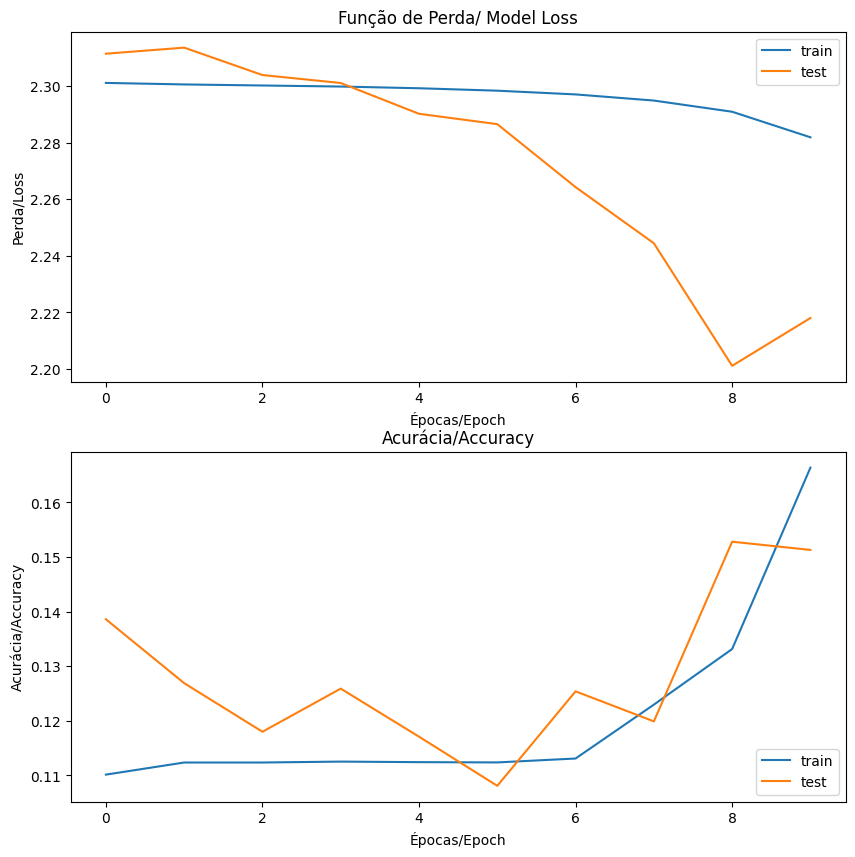

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
[[953   0   0   0   0   1  26   0   0   0]
 [ 18   0   1   3  33   0 951   0  15 114]
 [550   0   1  22   5   0 423   0   5  26]
 [274   2   0  20  32   3 639   0  30  10]
 [526   0   5  50  20   0 322   0  11  48]
 [318   0   0  83   3   3 461   0  24   0]
 [528   0   0   0   3   0 425   0   0   2]
 [429   0   1   7  71   0 404   0  13 103]
 [209   0   1  21   1   0 725   0  14   3]
 [353   0   9  51  18   0 497   0   4  77]]
Saved trained model at /content/trained_lenet5_mnist/model.keras 
Saved side information at /content/trained_lenet5_mnist/std_dev.csv 


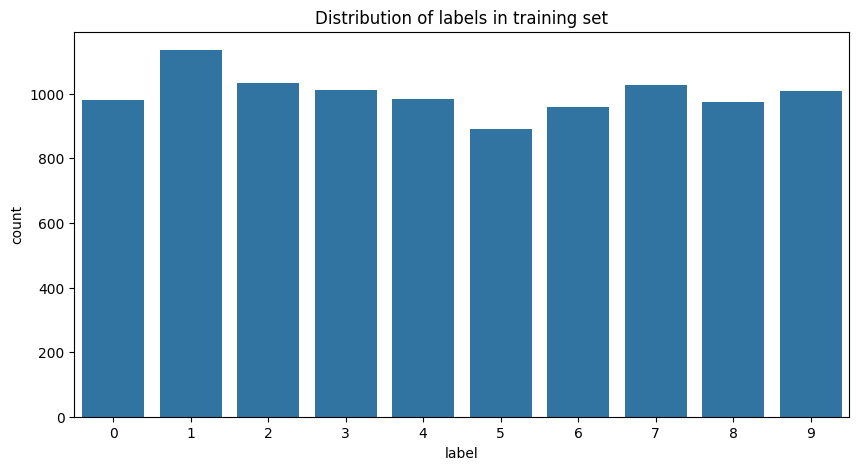

In [ ]:
# Definir a arquitetura do modelo
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)
kernel_size = (5, 5)
num_kernel_first_conv_layer = 6
num_kernel_second_conv_layer = 16

model = Sequential()

model.add(Conv2D(num_kernel_first_conv_layer, kernel_size, input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Conv2D(num_kernel_second_conv_layer, kernel_size, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Definir o otimizador
optimizer = tf.optimizers.SGD(learning_rate=1e-2)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Treinar o modelo
BATCH_SIZE = 65
EPOCHS = 10
batch_history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(test_images, test_labels))

# Avaliar o modelo
result = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {result[1]}')

# Plotar as curvas de perda e acurácia
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Perda
axs[0].plot(batch_history.history['loss'], label='Perda de Treinamento')
axs[0].plot(batch_history.history['val_loss'], label='Perda de Validação')
axs[0].set_title('Função de Perda/ Model Loss')
axs[0].set_xlabel('Épocas/Epoch')
axs[0].set_ylabel('Perda/Loss')
axs[0].legend(['train', 'test'], loc='upper right')

# Acurácia
axs[1].plot(batch_history.history['accuracy'], label='Acurácia de Treinamento')
axs[1].plot(batch_history.history['val_accuracy'], label='Acurácia de Validação')
axs[1].set_title('Acurácia/Accuracy')
axs[1].set_xlabel('Épocas/Epoch')
axs[1].set_ylabel('Acurácia/Accuracy')
axs[1].legend(['train', 'test'], loc='lower right')

plt.show()

# Matriz de confusão
predictions = model.predict(test_images)
matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)

# Salvar o modelo e informações adicionais
save_dir = os.path.join(os.getcwd(), 'trained_lenet5_mnist')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_name = 'model.keras'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Salvar média e desvio padrão como CSV
model_name = 'std_dev.csv'
model_path = os.path.join(save_dir, model_name)
w = csv.writer(open(model_path, "w"))
dict = {'mean': train_mean, 'std': train_std}
for key, val in dict.items():
    w.writerow([key, val])
print('Saved side information at %s ' % model_path)

# Plotar a distribuição dos labels originais
plt.figure(figsize=(10,5))
datas = pd.DataFrame(ori_test_labels, columns=['label'])
sns.countplot(x='label', data=datas)
plt.title('Distribution of labels in training set')
plt.show()